<a href="https://colab.research.google.com/github/FrancoCarrillo/FastRoute/blob/main/semana9Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Semana 9"**

Considere una situación con un número de personas y siguiendo las tareas a realizar en ellas.

Agregar una nueva relación de amistad, es decir, una persona x se convierte en amiga de otra persona y.

Encuentra si el individuo x es un amigo del individuo y (amigo directo o indirecto)

Nos dan 10 individuos: a, b, c, d, e, f, g, h, i, j

Las siguientes son las relaciones que deben agregarse.

a ⇐⇒ b

b ⇐⇒ d

c ⇐⇒ f 

c ⇐⇒ i 

j ⇐⇒ e 

g ⇐⇒ j

Y tenemos consultas como: a es amigo de d o no

Básicamente necesitamos crear los siguientes 4 grupos: 

G1 = {a, b, d}

G2 = {c, f, i}

G3 = {e, g, j}

G4 = {h}

Mantener una conexión de acceso rápido entre los elementos de los grupos.


In [ ]:
import graphviz as gv
import numpy as np

In [ ]:
#@title Dibujar grafo
def drawUF(a=[], lis=[],labels=[],labeled='False', weighted='False'):
    dot = gv.Digraph(comment='ListaDeCompononentes')
    n = len(a)
    if labeled=='False':
      for i in range(n):
        dot.node(str(i), str(i))
      for i in range(n):
        if i != a[i]:
          dot.edge(str(i), str(a[i]))
    else:
      for i in range(n):
        dot.node(labels[i],labels[i])
      for i in range(n):
        if weighted=='False':
            if labels[i]!=a[i]:
              dot.edge(labels[i], a[i])
        else:
            if lis[i]>=0:
              dot.edge(labels[i], labels[lis[i]])
    dot.graph_attr['rankdir'] = 'BT'
    return dot


In [ ]:
#@title Class QuickFind
class QuickFind(object): #el arreglo es de raíces
    def __init__(self, N):
        self.lst = list(range(N))
    def find(self, p, q):
        return self.lst[p] == self.lst[q]
    def union(self, p, q):
        pid = self.lst[p]
        qid = self.lst[q]
        if pid==qid:
            print("Unido")
            return 
        for ind in range(len((self.lst))):
            if self.lst[ind] == pid:
                self.lst[ind] = qid
        print(self.lst) 
    def getList(self):
        return self.lst
        

In [ ]:
#@title Class QuickUnion
class QuickUnion(object):#el arerglo es de padres
    def __init__(self, N):
        self.lst = list(range(N))
    def find(self, ind):
        while ind != self.lst[ind]:
            ind = self.lst[ind]
        return ind
    def connected(self, p, q): #consulta
        return self.find(p) == self.find(q)
    def union(self, p, q):
        qid=self.find(q)
        #pid = self.find(p)
        self.lst[qid] = self.find(p)
    def getList(self):
        return self.lst


In [ ]:
#@title Class QuickUnion Árbol ponderado
class WeightedQuickUnion(object):
  def __init__(self,N):
    self.lst=list(-1 for _ in range(N))
  def find(self, ind):
    while self.lst[ind]>=0:
      ind = self.lst[ind]
    return ind
  def connected(self, a, b):
    return self.find(a)==self.find(b)
  def union(self, a,b):
    if self.connected(a,b): return
    pa = self.find(a) # la raiz de a
    pb = self.find(b) # la raiz de b
    #print(self.lst[pa], self.lst[pb])  # lo que se compara es el tamaño de los árboles de las raíces
    if self.lst[pa] <= self.lst[pb]:  #pa tiene mayor o igual cnt de nodos que pb
        self.lst[pa] += self.lst[pb]
        self.lst[pb] = pa
    else:                                # self.lst[pa] > self.lst[pb]:pb tiene mayor cnt de nodos que pa
        self.lst[pb] += self.lst[pa]
        self.lst[pa] = pb
    
  def getList(self):
    return self.lst

In [ ]:
#@title Class QuickUnion Ponderado con compresión
class WQUwithCompression(object):
  def __init__(self,N):
    self.lst=list(-1 for _ in range(N))
  def find(self, ind):
    #if self.lst[ind]<0: return ind
    #self.lst[ind]=self.find(self.lst[ind])
    root = ind    
    while self.lst[root]>=0:
      root=self.lst[root]
    while ind!=root:
      next=self.lst[ind]
      self.lst[ind]=root
      ind=next

    return root
  def connected(self, a, b):
    return self.find(a)==self.find(b)
  def union(self, a,b):
    if self.connected(a,b): return
    pa = self.find(a) # la raiz de a
    pb = self.find(b) # la raiz de b
    #print(self.lst[pa], self.lst[pb])  # lo que se compara es el tamaño de los árboles de las raíces
    if self.lst[pa] <= self.lst[pb]:  #pa tiene mayor o igual cnt de nodos que pb
        self.lst[pa] += self.lst[pb]
        self.lst[pb] = pa
    else:                                # self.lst[pa] > self.lst[pb]:pb tiene mayor cnt de nodos que pa
        self.lst[pb] += self.lst[pa]
        self.lst[pa] = pb
    self.find(a)
    self.find(b)
  def getList(self):
    return self.lst

In [ ]:
#@title Input
%%file inp.txt
a b c d e f g h i j
a b
b d
c f
c i
j e
g j

Writing inp.txt


In [ ]:
#@title Reading function
def reading(myfile, hashlabels=False, weighted=False):
  with open(myfile) as inp:
    labels=None
    if hashlabels:
      labels = inp.readline().strip().split()
    Unions=[]
    for line in inp:
      Unions.append(list(line.strip().split()))

  return labels, Unions      

# **Ejercicio 1**
### Ejercicio 1.1
Implemente las funciones Find y Union.

### Ejercicio 1.2
Implemente un algoritmo para gestionar el grupo de amigos descrito en la primera parte

[['a' 'b']
 ['b' 'd']
 ['c' 'f']
 ['c' 'i']
 ['j' 'e']
 ['g' 'j']]
['a', 'a', 'c', 'a', 'j', 'c', 'g', 'h', 'c', 'g']


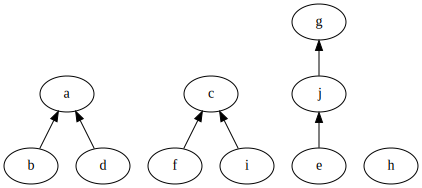

In [ ]:
labels,unions=reading("inp.txt", hashlabels=True)
mydic={labels[i]:i for i in range(len(labels))}
obj=QuickUnion(len(labels))
for i in range(len(unions)):
  obj.union(mydic[unions[i][0]], mydic[unions[i][1]])
lis=obj.getList()
newlist=[labels[lis[i]] for i in range(len(lis))]
print(np.array(unions))
print(newlist)
drawUF(a=newlist,labels=labels, labeled='True')


#**Ejercicio 2: Mejoras**


###Ejercicio 2.1: Unión por rangos//árbol ponderado//weighted

[-3, 0, -3, 0, 9, 2, 9, -1, 2, -3]


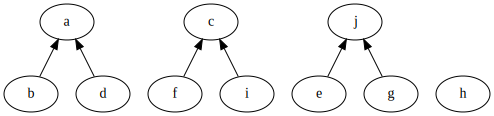

In [ ]:
labels,unions=reading("inp.txt", hashlabels=True)
mydic={labels[i]:i for i in range(len(labels))}
obj2=WeightedQuickUnion(len(labels))
for i in range(len(unions)):
  obj2.union(mydic[unions[i][0]], mydic[unions[i][1]])
lis=obj2.getList()
newlist=[labels[lis[i]]for i in range(len(lis))]
print(lis)
drawUF(a=newlist, lis=lis,labels=labels, labeled='True', weighted='True')


###Ejercicio 2.2: Compresión de caminos//comprensión de la ruta

[-6, 0, 0, 0, 9, 0, 9, -1, 0, -3]


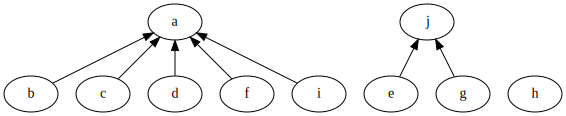

In [ ]:
labels,unions=reading("inp.txt", hashlabels=True)
mydic={labels[i]:i for i in range(len(labels))}
obj3=WQUwithCompression(len(labels))
for i in range(len(unions)):
  obj3.union(mydic[unions[i][0]], mydic[unions[i][1]])
obj3.union(mydic['d'], mydic['f'])
obj3.find(mydic['i'])
lis=obj3.getList()
newlist=[labels[lis[i]]for i in range(len(lis))]
print(lis)
drawUF(a=newlist, lis=lis,labels=labels, labeled='True', weighted='True')

